In [1]:
import numpy as np
import pandas as pd
import graphs

In [2]:
graphs.init_setup()

In [3]:
years = pd.read_csv('acousticbrainz-2015-01-actual-release-years.csv', header=None)

In [4]:
year_counts = pd.Series.value_counts(years[1])

year_counts = year_counts.drop(labels=list(filter(lambda x: (x<1950.0),year_counts.keys())))
year_keys = pd.to_numeric(year_counts.keys(), downcast='integer')

quantiles = years[1].quantile([0.25,0.5,0.75]) - 1950

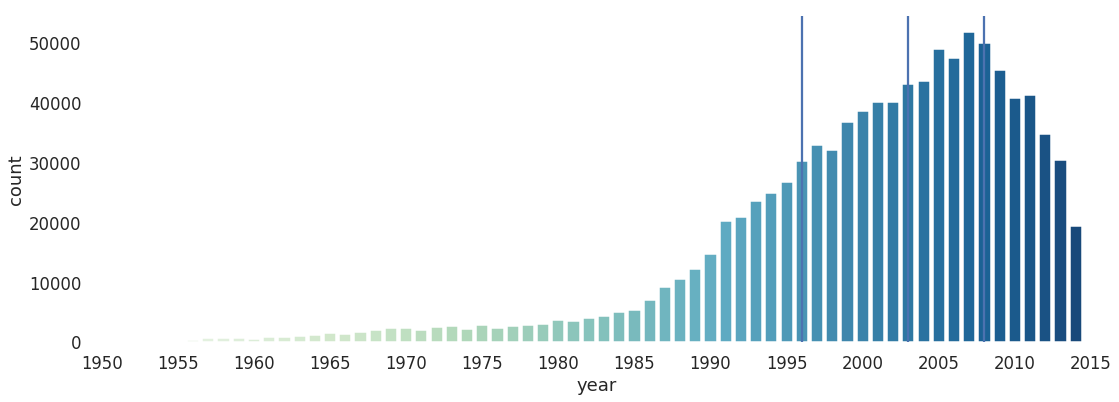

In [5]:
graphs.year_bar(year_counts, year_keys, quantiles)

In [6]:
features = pd.read_csv('ab-2017-01-23-loudness-features.csv')

In [7]:
y_dict = dict(zip(years[0], years[1]))

avg_loudness = features['average_loudness']
f_mbids = features['recording_mbid']
l_dict = dict(zip(f_mbids, avg_loudness))

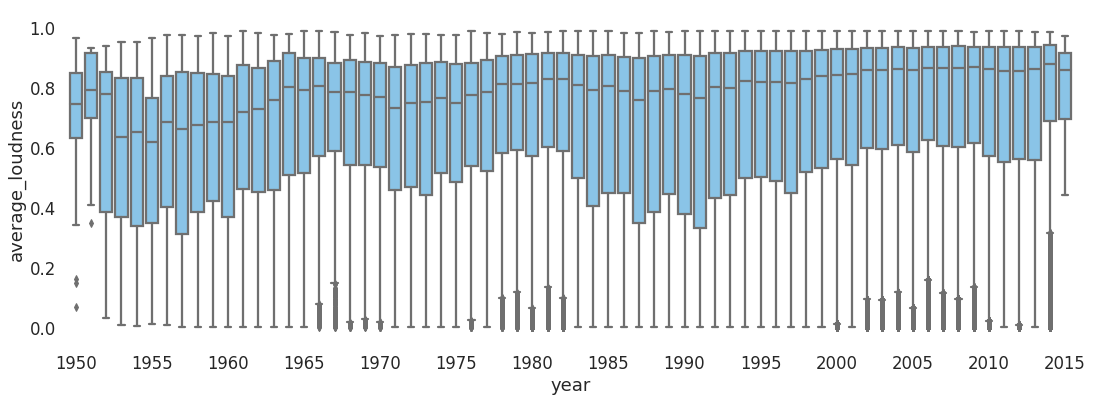

In [8]:
graphs.features_years_box(y_dict, l_dict, 'average_loudness')

In [9]:
ll_features = pd.read_csv('ab-2017-01-23-lowlevel-features.csv', low_memory=False)

In [10]:
f_mbid = ll_features['recording_mbid']
bpm = ll_features['bpm']
f_dict = dict(zip(f_mbid, bpm))

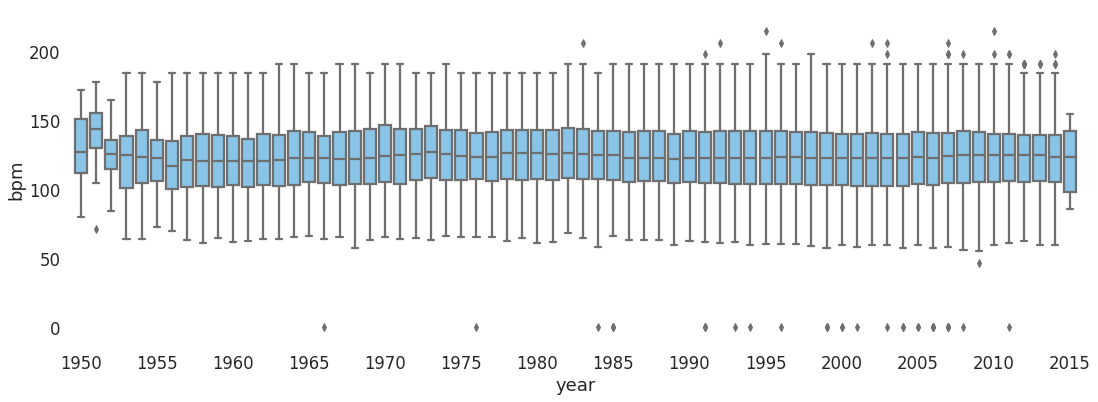

In [11]:
graphs.features_years_box(y_dict, f_dict, 'bpm')